importing libraries 

In [17]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

opening intent.josn file to access the intent of user for making the posts and storing in the list

In [85]:
with open('intent.json') as f:
    intent = json.load(f)

all_intent = []

for text in intent:
    all_intent.append(text['intent'])

this script displays the post intent in the bar graph

/tmp/ipykernel_6677/2589447112.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=categories, y=counts, palette='viridis')


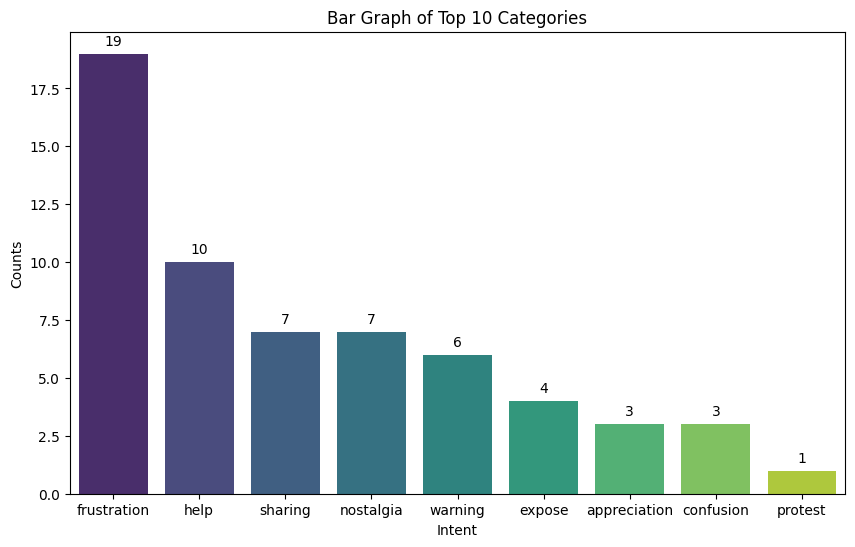

In [89]:
# Count the frequency of each category
data_count = Counter(all_intent)

# Get the top 10 categories
top_10 = data_count.most_common(10)
top_10_keys = [item[0] for item in top_10]
top_10_values = [item[1] for item in top_10]

# Prepare the data for the plot
categories = top_10_keys
counts = top_10_values

# Create a bar graph using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=categories, y=counts, palette='viridis')

# Add annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.xlabel('Intent')
plt.ylabel('Counts')
plt.title('Bar Graph of Top 10 Categories')

# Save the plot
plt.savefig('bar_graph_top_10.png')

# Show the plot
plt.show()


here we are loading the title of the posts to determine the talking point of the posts

In [12]:
list_of_posts = []

for post in data:
    list_of_posts.append(post['title'])

this script creates the worldcloud of all the posts, this would be helpfult o determine the main talking point within this month

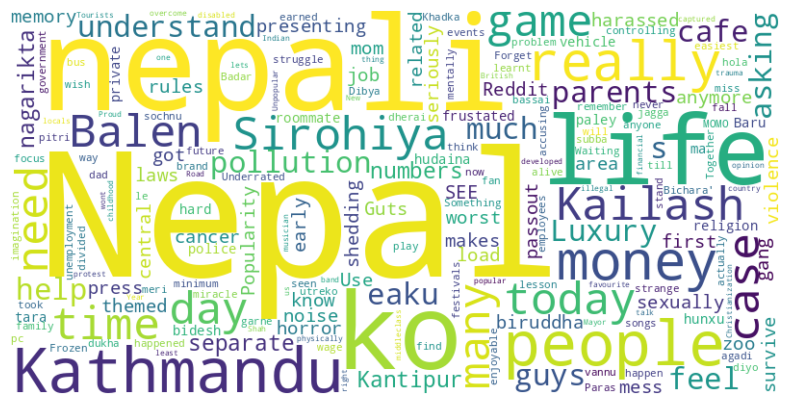

In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def remove_stopwords(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Get English stopwords
    stop_words = set(stopwords.words('english'))

    # Filter out stopwords
    filtered_words = [word for word in words if word.lower() not in stop_words]

    # Join the filtered words back into a string
    filtered_text = ' '.join(filtered_words)

    return filtered_text


# Combine paragraphs into a single string
text = ' '.join(list_of_posts)

filtered_text = remove_stopwords(text)

# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud.png')
plt.show()


In [14]:
import json
with open('posts.json') as f:
    data = json.load(f)

articles = []

for post in data:
    articles.append(post['title'])

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Preprocessing function
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(filtered_tokens)


# Preprocess posts
cleaned_posts = [preprocess_text(post) for post in articles]

# Vectorize the cleaned text data
vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X = vectorizer.fit_transform(cleaned_posts)

# Number of clusters (you can adjust this based on your needs)
num_clusters = 5

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Assign clusters to each post
clusters = kmeans.labels_

# Create a DataFrame to display the results
df = pd.DataFrame({'post': articles, 'cluster': clusters})

# Display some example posts from each cluster
for i in range(num_clusters):
    print(f"\nCluster {i} examples:")
    print(df[df['cluster'] == i]['post'].tolist())


In [53]:
with open('reasons.json') as f:
    data = json.load(f)

for item in data:
    print(item['cluster'])
    print(f"reasrons: {item['reason']}")
    print("_______________________________\n\n")

['I got sexually harassed for the first time today.', "My mom has cancer, I don't know what to do?", 'Had the worst day of my life', 'I need a job. I have no money to survive anymore.', 'How many Nepalis Use Reddit seriously?', 'The central zoo is a mess .', 'Does Kathmandu really have no laws/rules for noise pollution related to religion?', "Life is hard in Kathmandu if you don't own a private vehicle.", "I'm frustated with my roommate.", 'How many of you guys have controlling parents?', 'What is the lesson you learnt from your life till now?', 'Has anyone seen pitri utreko?', 'I miss my dad so much i wish ……', 'Something really strange happened to me on bus today? What actually was that?', 'Frozen MOMO problem in kathmandu .', 'Luxury brand will never be luxury for me.', 'is he alive or just my imagination ? help me to understand this.', "I don't understand people accusing Paras Khadka", "What's the easiest way you have earned money?", 'How much unemployment do we have here?', "It fe